# Airline Fare Prediction

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
train_data=pd.read_excel(r"C:\Users\matin\Downloads/Data_Train.xlsx")

In [113]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [114]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


#### Removing the null values

In [115]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [116]:
train_data[train_data["Route"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [117]:
train_data.dropna(inplace=True)

In [118]:
data=train_data.copy()

### Featurization

In [119]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [120]:
def change_into_datetime(col):
    data[col]=pd.to_datetime(data[col])

In [121]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [122]:
for feature in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(feature)
    

In [123]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

#### Lets work with date and time first

In [124]:
data['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

In [125]:
data['Date_of_Journey'].max()

Timestamp('2019-12-06 00:00:00')

In [126]:
data['Journey_day']=data['Date_of_Journey'].dt.day
data['Journey_Month']=data['Date_of_Journey'].dt.month
data['Journey_year']=data['Date_of_Journey'].dt.year

In [127]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-07-13 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-07-13 05:50:00,2022-07-13 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-07-13 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-07-13 18:05:00,2022-07-13 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-07-13 16:50:00,2022-07-13 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


In [128]:
def extract_hour_minute(df,col):
    df[col+'hour']=df[col].dt.hour
    df[col+'minute']=df[col].dt.minute
    df.drop(col,axis=1,inplace=True)
    return df.head(3)

In [129]:
extract_hour_minute(data,'Dep_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Journey_year,Dep_Timehour,Dep_Timeminute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-07-13 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25


In [135]:
extract_hour_minute(data,'Arrival_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Journey_year,Dep_Timehour,Dep_Timeminute,Arrival_Timehour,Arrival_Timeminute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25


In [130]:
def flight_dep_time(x):
    if (x>4) and (x<8):
        return 'Early Morning'
    elif (x>8) and (x<12):
        return  'Morning'
    elif (x>12) and (x<16):
        return  'Noon'
    elif (x>16) and (x<20):
        return  'Evening'
    elif (x>20) and (x<12):
        return  'Night'
    else:
        return  'Late Night'
        

In [131]:
#lets make this bar chart more attractive
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [132]:
cf.go_offline()

In [136]:
data['Dep_Timehour'].apply(flight_dep_time).value_counts().iplot(kind='bar')

In [137]:
data.drop(columns='Date_of_Journey',axis=1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Journey_year,Dep_Timehour,Dep_Timeminute,Arrival_Timehour,Arrival_Timeminute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,2019,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,2019,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,2019,11,30,14,10


In [138]:
def preprocess_duration(x):
    if 'h' not in x:
        x='0h '+x
        return x
    elif 'm' not in x:
        x=x+' 0m'
        return x
    else:
        return x
        

In [139]:
data['duration']=data['Duration'].apply(preprocess_duration)

In [140]:
data['Duration'].apply(preprocess_duration)[0].split()[0]

'2h'

In [141]:
data['Duration'].apply(preprocess_duration)[0].split()[1]

'50m'

In [142]:
int(data['duration'][0].split()[0][:-1]) #int in hour

2

In [143]:
int(data['duration'][0].split()[1][:-1]) #int in minute

50

In [144]:
data['duration_hour']=data['duration'].apply(lambda x:int(x.split()[0][:-1]))

In [145]:
data['duration_minute']=data['duration'].apply(lambda x:int(x.split()[1][:-1]))

In [146]:
data.drop(columns='duration')

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Journey_year,Dep_Timehour,Dep_Timeminute,Arrival_Timehour,Arrival_Timeminute,duration_hour,duration_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,2019,19,55,22,25,2,30
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,2019,8,20,11,20,3,0
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,2019,11,30,14,10,2,40


#### lets analyse whether duration impact the price or not?


In [147]:
data['Duration_total_mins']=data['Duration'].str.replace('h','*60').str.replace('m','*1').str.replace(' ','+').apply(eval)

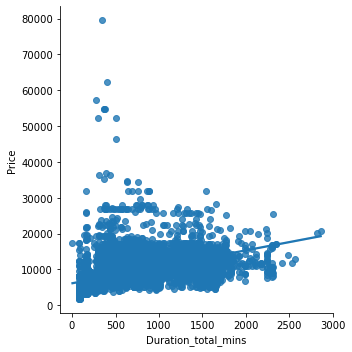

In [148]:
#Lets do plot( total_mins Vs Price)
sns.lmplot(x='Duration_total_mins',y='Price',data=data)

In [149]:
#Which city has maximum final destination flight
data['Destination'].count()

10682

In [150]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [151]:
data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:ylabel='Destination'>

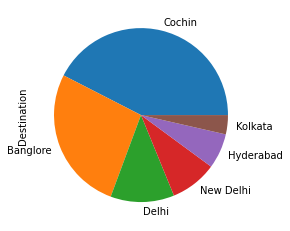

In [152]:
data['Destination'].value_counts().plot(kind='pie')

In [153]:
## On which route the jet airways is mostly used
##. select rows where airline is jet airways then make group of routes
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

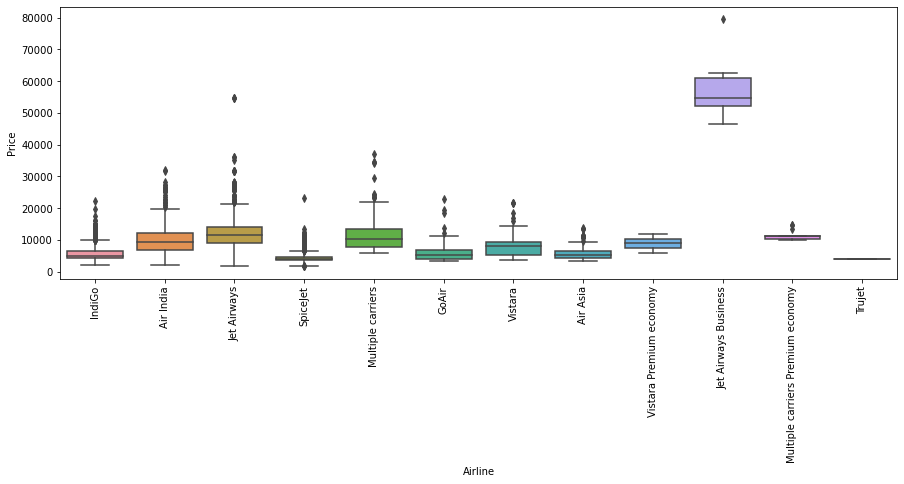

In [154]:
## Airline Vs Price Analysis
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline',data=data)
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

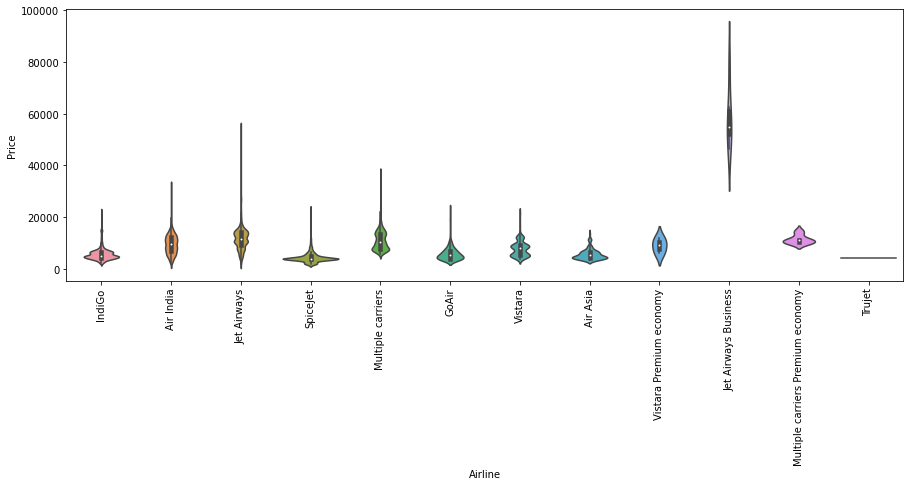

In [155]:
plt.figure(figsize=(15,5))
sns.violinplot(y='Price',x='Airline',data=data)
plt.xticks(rotation='vertical')

In [156]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Journey_year,Dep_Timehour,Dep_Timeminute,Arrival_Timehour,Arrival_Timeminute,duration,duration_hour,duration_minute,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2h 50m,2,50,170
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7h 25m,7,25,445
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25,19h 0m,19,0,1140
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5h 25m,5,25,325
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4h 45m,4,45,285


In [157]:
data['Route'].value_counts()/len(data)

DEL → BOM → COK          0.222430
BLR → DEL                0.145291
CCU → BOM → BLR          0.091650
CCU → BLR                0.067778
BOM → HYD                0.058135
                           ...   
CCU → VTZ → BLR          0.000094
CCU → IXZ → MAA → BLR    0.000094
BOM → COK → MAA → HYD    0.000094
BOM → CCU → HYD          0.000094
BOM → BBI → HYD          0.000094
Name: Route, Length: 128, dtype: float64

In [158]:
np.round(data['Additional_Info'].value_counts()/len(data)*100,2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

In [159]:
data.drop(columns=['Additional_Info','Route','Date_of_Journey','Journey_year','Duration_total_mins'],axis=1,inplace=True)

In [160]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_Month', 'Dep_Timehour', 'Dep_Timeminute',
       'Arrival_Timehour', 'Arrival_Timeminute', 'duration', 'duration_hour',
       'duration_minute'],
      dtype='object')

In [161]:
## Apply OneHotEncoding
cat_feature=[feature for feature in data.columns if data[feature].dtype=='O']
num_feature=[feature for feature in data.columns if data[feature].dtype!='O']

In [162]:
cat_feature

['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'duration']

In [163]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [164]:
data['Source'] ## Lable encoding for Ordinal Data

0        Banglore
1         Kolkata
2           Delhi
3         Kolkata
4        Banglore
           ...   
10678     Kolkata
10679     Kolkata
10680    Banglore
10681    Banglore
10682       Delhi
Name: Source, Length: 10682, dtype: object

In [165]:
data['Source'].apply(lambda x: 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [166]:
for category in data['Source'].unique():
    data['Source'+category]=data['Source'].apply(lambda x: 1 if x==category else 0)

In [167]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_Month,Dep_Timehour,Dep_Timeminute,Arrival_Timehour,Arrival_Timeminute,duration,duration_hour,duration_minute,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2h 50m,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7h 25m,7,25,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,6,9,9,25,4,25,19h 0m,19,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,5h 25m,5,25,0,1,0,0,0
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35,4h 45m,4,45,1,0,0,0,0


In [168]:
## Target guided Encoding
airlines=data.groupby(['Airline'])['Price'].mean().sort_values().index

In [169]:
#dictionary comprehension
dict1={key:index for index,key in enumerate(airlines,0)}

In [170]:
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [171]:
data['Airline']=data['Airline'].map(dict1)

In [172]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_Month,Dep_Timehour,Dep_Timeminute,Arrival_Timehour,Arrival_Timeminute,duration,duration_hour,duration_minute,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2h 50m,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7h 25m,7,25,0,1,0,0,0


In [173]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [174]:
data['Destination'].replace('New Delhi','Delhi',inplace=True)

In [175]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [176]:
dest=data.groupby(['Destination'])['Price'].mean().sort_values().index

In [177]:
dict2={key:index for index,key in enumerate(dest,0)}

In [178]:
data['Destination']=data['Destination'].map(dict2)

In [179]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_Month,Dep_Timehour,Dep_Timeminute,Arrival_Timehour,Arrival_Timeminute,duration,duration_hour,duration_minute,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,Banglore,2,2h 50m,non-stop,3897,24,3,22,20,1,10,2h 50m,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,5,1,5,50,13,15,7h 25m,7,25,0,1,0,0,0


In [180]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [181]:
no_of_stops=data.groupby(['Total_Stops'])['Price'].mean().sort_values().index

In [182]:
dict3={key:index for index,key in enumerate(no_of_stops,0)}

In [183]:
data['Total_Stops']=data['Total_Stops'].map(dict3)

In [184]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_Month,Dep_Timehour,Dep_Timeminute,Arrival_Timehour,Arrival_Timeminute,duration,duration_hour,duration_minute,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,Banglore,2,2h 50m,0,3897,24,3,22,20,1,10,2h 50m,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662,5,1,5,50,13,15,7h 25m,7,25,0,1,0,0,0


In [185]:
## detecting outlier and handling 'em. '
def plot(df,feature):
    fig,(axs1,axs2,axs3)=plt.subplots(3,1)
    sns.distplot(df[feature],ax=axs1)
    sns.boxplot(df[feature],ax=axs2)
    sns.distplot(df[feature],ax=axs3,kde=False)

    

C:\Users\matin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\matin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\matin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



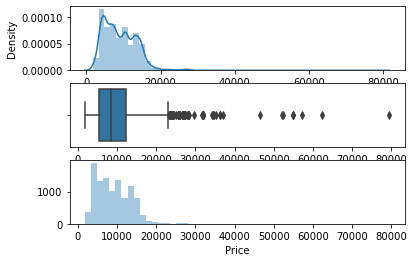

In [186]:
plot(data,'Price')

In [187]:
data['Price']=np.where(data['Price']>=35000,data['Price'].median(),data['Price'])

C:\Users\matin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\matin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



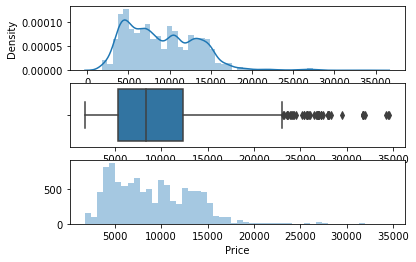

In [188]:
plot(data,'Price')


In [189]:
data.drop(columns=['Source','Duration','duration'],inplace=True)

In [190]:
data.head()

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_Month,Dep_Timehour,Dep_Timeminute,Arrival_Timehour,Arrival_Timeminute,duration_hour,duration_minute,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882.0,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1,6218.0,5,12,18,5,23,30,5,25,0,1,0,0,0
4,3,2,1,13302.0,3,1,16,50,21,35,4,45,1,0,0,0,0


In [191]:
#feature_selection using sklearn
from sklearn.feature_selection import mutual_info_regression


In [192]:
X=data.drop(columns=['Price'],axis=1)

In [193]:
y=data['Price']

In [194]:
 mutual_info_regression(X,y)

array([0.97531148, 0.99090451, 0.78721511, 0.19824047, 0.23405113,
       0.33813669, 0.25495945, 0.40141177, 0.34877228, 0.46662436,
       0.33916432, 0.38459306, 0.45525568, 0.51989352, 0.13076793,
       0.2017171 ])

In [195]:
imp=pd.DataFrame( mutual_info_regression(X,y),index=X.columns)
imp.columns=['importance']

In [196]:
imp.sort_values(by='importance',ascending=False)

,importance
Destination,1.004361
Airline,0.974882
Total_Stops,0.790250
SourceDelhi,0.519472
duration_hour,0.463968
SourceKolkata,0.455443
Arrival_Timehour,0.399141
SourceBanglore,0.391057
duration_minute,0.344936
Arrival_Timeminute,0.342683


## Machine_Learning_Model

In [197]:
from sklearn.model_selection import train_test_split


In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [199]:
from sklearn.ensemble import RandomForestRegressor


In [200]:
ml_model=RandomForestRegressor()

In [201]:
model=ml_model.fit(X_train,y_train)

In [202]:
y_pred=model.predict(X_test)

#### Custom Evaluation

In [203]:
def mape(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [204]:
mape(y_test,y_pred)

13.287699505501774

In [205]:
def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    print('Training_score: {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print("Predictions are {}".format(y_prediction))
    print('\n')
    
    from sklearn import metrics
    r2_score=metrics.r2_score(y_test,y_prediction)
    print("r2_score: {}".format(r2_score))
    print('Mean_Squared_Error: ',metrics.mean_squared_error(y_test,y_prediction))
    print('Mean_Absolute_Error: ',metrics.mean_absolute_error(y_test,y_prediction))
    print('RooT_Mean_Squared_Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    print('MAPE: ',mape(y_test,y_prediction))
    sns.distplot(y_test-y_prediction)

    

Training_score: 0.9516517388926528
Predictions are [16718.62  6386.12  8846.38 ...  3566.37  6159.08  7016.47]


r2_score: 0.8031394551949107
Mean_Squared_Error:  3832402.276183952
Mean_Absolute_Error:  1188.5350190279269
RooT_Mean_Squared_Error:  1957.6522357619988
MAPE:  13.30531300388714


C:\Users\matin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



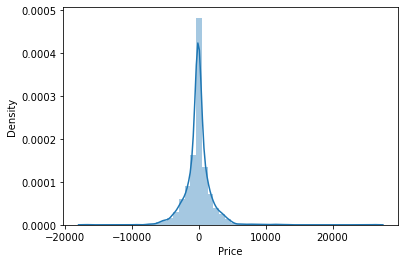

In [206]:
predict(RandomForestRegressor())